# **CO2 Regression analysis on 86 countries and UK’s Forecast Analysis, leveraging records from the vast majority of countries worldwidee.**

###**A Machine Learning Project**
####by Fabian Chukwunonso Umeh
   ***
##**Phase 1: Data cleaning and preparation**
***
### **Phase 1 Notebook Content:**
 1. Project Overview
 2. Notebook setup - Libraries and data imports
 3. Data Overview
  - Data shape
  - preview
  - column description
  - data type (columns)
  - Statistical summary
  - missing values
 4. Data Cleaning
 5. Handling missing data optimally
 6. Final shape of data
 7. Export of cleaned DataFrame to a file

***
###**1. Project Overview**
***
Industrialization and Human Emission of carbon-di-oxide are among the key drivers of climate change.
***
**Aim of project:** Analysis of country specific record in desinging machine learning models for prediction and Forcast of CO2 emmision, leveraging records from vast majority of countries worldwide including:

- Annual production of coal from different sources like coal and cement
- population
- Econimic indicator - GDP
- Emissions from oil
- etc
Using recent records from 1990-2020
***
The project is sub-divided into four phases:
1. Data cleaning and preparation
2. Data Visualization and Exploration
3. Predictive analysis with 
  - Random Forest algorithm
  - k-nearest neighbors algorithm
  - Decision Trees learning algorithm
  - multilayer perceptron(Neural network model)
4. Forcast analysis:
 - Univariate
 - Multi-variate

**Each phase is analysed on a different Notebook(.ipynp file).**
***
 A special aknowledgement to **Vladislav Todorov** whose work flow methodology has been adopted.
 ***
### **Data source**
The used data stems from the Co2 and greenhouse gas emissions by Our World In Data. It includes data on CO2 emissions (annual, per capita, cumulative and consumption-based), other greenhouse gases, energy mix, and other relevant metrics. __[Here](https://github.com/owid/co2-data)__ is the link to the dataset

**Note:** The dataset is updated regularly and may differ slightly with the one used for this analysis.
***
###**Notebook summary - Phase 1: Data cleaning and preparation**
***
**Aim of this notebook:** The goal of this particular notebook is prepare the dataset for further analysis.

**Input:** CSV (comma separated values) data file from owid website(Our World In Data).

**Output:** CSV file containing the cleaned data.

**Programming language:** Python 3.7

**Libraries used in this notebook:** pandas, numpy, statistics, and warnings.

**External package to be installed:** None.

***
### **2. Notebook setup - Libraries and data imports**
***
Importing Libraries:


In [ ]:
import pandas as pd
import numpy as np
import statistics
from statistics import mode
import seaborn as sns
import matplotlib_inline
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# define file name
file_name = "owid-co2-data.csv"
codebook = "codebook.csv"

# read file from csv to pandas DataFrame
raw_data = pd.read_csv(file_name)
# read codebook to pandas DataFrame
cols = pd.read_csv(codebook, index_col=0)


***
###**3. Data Overview**
***

In [ ]:
print('Shape of data:')
raw_data.shape

Shape of data:


(25204, 58)

In [ ]:
print('Data preview:')
raw_data.head()

Data preview:


,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.0,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.0,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [ ]:
#column description
cols

,Description,Unit
Column,,
iso_code,three-letter country codes,NaN
country,Geographic location,NaN
year,Year of observation,NaN
co2,carbon dioxide (CO2) emission.,(106) tonnes
co2_per_capita,emissions of carbon dioxide (CO2).,tonnes per person
trade_co2,(CO2) emissions embedded in trade.,(106) tonnes
cement_co2,(CO2) emissions from cement.,(106) tonnes
cement_co2_per_capita,(CO2)emission from cement.,tonnes per person
coal_co2,emissions of (CO2) from coal.,(106) tonnes


In [ ]:
print('Data type per column:')
raw_data.dtypes

Data type per column:


iso_code                                object
country                                 object
year                                     int64
co2                                    float64
consumption_co2                        float64
co2_growth_prct                        float64
co2_growth_abs                         float64
trade_co2                              float64
co2_per_capita                         float64
consumption_co2_per_capita             float64
share_global_co2                       float64
cumulative_co2                         float64
share_global_cumulative_co2            float64
co2_per_gdp                            float64
consumption_co2_per_gdp                float64
co2_per_unit_energy                    float64
coal_co2                               float64
cement_co2                             float64
flaring_co2                            float64
gas_co2                                float64
oil_co2                                float64
other_industr

In [ ]:
print('Statistical summary:')
raw_data.describe()

Statistical summary:


,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
count,25204.000000,23949.000000,3976.000000,24931.000000,23585.000000,3976.000000,23307.000000,3976.000000,23949.000000,2.394900e+04,...,5155.000000,5211.000000,5157.000000,5211.000000,5157.000000,2.287800e+04,1.353800e+04,8690.000000,8681.000000,6803.000000
mean,1953.225797,267.861942,916.755170,21.098600,5.146889,-2.415624,4.170811,6.567721,4.983979,1.035710e+04,...,8.099506,82.253370,2.046923,29.308135,0.606690,7.072322e+07,2.877088e+11,1569.083895,25568.487454,1.850291
std,53.791369,1521.680894,3373.348275,702.565991,55.259760,182.444942,14.912201,6.927957,17.704994,6.120603e+04,...,9.387477,566.702756,3.534126,199.291118,0.844671,3.795858e+08,2.180094e+12,9066.102799,33319.956208,1.575161
min,1750.000000,0.000000,0.197000,-99.640000,-1895.244000,-1657.998000,0.000000,0.055000,0.000000,0.000000e+00,...,-50.487000,0.000000,0.000000,0.000000,0.000000,1.490000e+03,5.543200e+07,0.000000,0.000000,0.050000
25%,1925.000000,0.528000,10.319750,-0.450000,-0.011000,-0.892500,0.253000,1.240250,0.010000,6.992000e+00,...,2.514000,2.150000,0.715000,0.535000,0.228000,1.291899e+06,9.828867e+09,6.997000,3270.369000,0.856000
50%,1967.000000,4.857000,57.091000,3.350000,0.059000,1.953000,1.250000,4.359500,0.060000,9.131800e+01,...,5.474000,9.030000,1.111000,3.590000,0.384000,4.880320e+06,3.037019e+10,61.404500,13701.318000,1.407000
75%,1995.000000,42.818000,276.378750,10.460000,1.103000,9.700500,4.657500,9.848500,0.600000,1.147514e+03,...,10.299000,31.055000,1.690000,10.570000,0.607000,1.759622e+07,1.268944e+11,352.884500,35493.775000,2.351000
max,2020.000000,36702.503000,36702.503000,102318.510000,1736.258000,1028.487000,748.639000,57.792000,100.000000,1.696524e+06,...,86.991000,8660.010000,39.812000,3054.000000,8.239000,7.794799e+09,1.136302e+14,162194.290000,317582.498000,13.493000


In [ ]:
print('The missing values in the original dataset per column:')
raw_data.isna().sum()

The missing values in the original dataset per column:


iso_code                                3256
country                                    0
year                                       0
co2                                     1255
consumption_co2                        21228
co2_growth_prct                          273
co2_growth_abs                          1619
trade_co2                              21228
co2_per_capita                          1897
consumption_co2_per_capita             21228
share_global_co2                        1255
cumulative_co2                          1255
share_global_cumulative_co2             1255
co2_per_gdp                             9815
consumption_co2_per_gdp                21443
co2_per_unit_energy                    16063
coal_co2                                8016
cement_co2                             12956
flaring_co2                            20822
gas_co2                                16359
oil_co2                                 4665
other_industry_co2                     23205
cement_co2

In [ ]:
print('The least year available in the dataset before cleaning was {} and maximum year was {}'.format(raw_data['year'].min(),raw_data['year'].max()))

The least year available in the dataset before cleaning was 1750 and maximum year was 2020


####**Key findings from Data Overview**
- Shape: 25204 rows and 58 columns.
- All columns are numeric(float 64 and int 64) excluding the country and ISO code columns.
- From the column preview, the data includes continental records and the overall world record.
- The least year in which a record was collected was 1750.
- The most recent records in the dataset was collected in 2020.
***
###**4. Data Cleaning**
***
The aim of this step is to make ready the dataset for further analysis. 

 ***
####**4.1 Setting the benchmark for analysis**
 ***

For the purpose of uniformity, only records from 1990 will be used irrespective of the presence of previous record older than 1990 from some countries.

In [ ]:
#code to select the year relevant to the analysis (1990 - 2020)
New_data = raw_data.loc[(raw_data['year'] > 1990)]

print('The length of the dataset before analysis was {}\n'.format(raw_data.shape[0]))
print('The length of the dataset after analysis was {}'.format(New_data.shape[0]))
New_data

The length of the dataset before analysis was 25204

The length of the dataset after analysis was 7277


,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
42,AFG,Afghanistan,1991,2.427,NaN,-6.76,-0.176,NaN,0.182,NaN,...,1.132,9.07,0.682,3.30,0.248,13299016.0,1.204736e+10,13.651,1026.439,0.567
43,AFG,Afghanistan,1992,1.379,NaN,-43.17,-1.048,NaN,0.095,NaN,...,0.939,9.00,0.621,3.21,0.222,14485543.0,1.267754e+10,8.961,618.620,0.366
44,AFG,Afghanistan,1993,1.333,NaN,-3.36,-0.046,NaN,0.084,NaN,...,0.849,8.90,0.563,3.21,0.203,15816601.0,9.834581e+09,8.935,564.895,0.487
45,AFG,Afghanistan,1994,1.282,NaN,-3.86,-0.051,NaN,0.075,NaN,...,0.775,8.97,0.525,2.99,0.175,17075728.0,7.919857e+09,8.617,504.612,0.604
46,AFG,Afghanistan,1995,1.230,NaN,-3.99,-0.051,NaN,0.068,NaN,...,0.743,9.15,0.505,3.07,0.170,18110662.0,1.230753e+10,7.246,400.105,0.338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25199,ZWE,Zimbabwe,2016,10.738,12.153,-12.17,-1.488,1.415,0.765,0.866,...,4.703,11.92,0.850,6.55,0.467,14030338.0,2.096179e+10,47.500,3385.574,1.889
25200,ZWE,Zimbabwe,2017,9.582,11.248,-10.77,-1.156,1.666,0.673,0.790,...,NaN,NaN,NaN,NaN,NaN,14236599.0,2.194784e+10,NaN,NaN,NaN
25201,ZWE,Zimbabwe,2018,11.854,13.163,23.72,2.273,1.308,0.821,0.912,...,NaN,NaN,NaN,NaN,NaN,14438812.0,2.271535e+10,NaN,NaN,NaN
25202,ZWE,Zimbabwe,2019,10.949,12.422,-7.64,-0.905,1.473,0.748,0.848,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,NaN,NaN,NaN


In [ ]:
print('There are {} Unique countries in the dataset before cleaning, they include:'.format(len(New_data['country'].unique())))
print(New_data['country'].unique())

There are 244 Unique countries in the dataset before cleaning, they include:
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia'
 'Asia (excl. China & India)' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Christmas Island' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus'
 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'EU-27' 'EU-28' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'Europ

In [ ]:
print('There are {} Unique ISO codes before data cleaning, and they include'.format(len(New_data['iso_code'].unique())))
print(New_data['iso_code'].unique())

There are 220 Unique ISO codes before data cleaning, and they include
['AFG' nan 'ALB' 'DZA' 'AND' 'AGO' 'AIA' 'ATA' 'ATG' 'ARG' 'ARM' 'ABW'
 'AUS' 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU'
 'BTN' 'BOL' 'BES' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM'
 'CMR' 'CAN' 'CPV' 'CAF' 'TCD' 'CHL' 'CHN' 'CXR' 'COL' 'COM' 'COG' 'COK'
 'CRI' 'CIV' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM'
 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ' 'ETH' 'FRO' 'FJI' 'FIN' 'FRA'
 'GUF' 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GRL' 'GRD' 'GLP' 'GTM'
 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ'
 'IRL' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'OWID_KOS' 'KWT'
 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MDG' 'MWI'
 'MYS' 'MDV' 'MLI' 'MLT' 'MHL' 'MTQ' 'MRT' 'MUS' 'MYT' 'MEX' 'MDA' 'MNG'
 'MNE' 'MSR' 'MAR' 'MOZ' 'MMR' 'NAM' 'NRU' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC'
 'NER' 'NGA' 'NIU' 'PRK' 'MKD' 'NOR' 'OMN' 'PAK' 'PLW' 'P

***
#### **4.2 Removing the continent and world records**
***

In [ ]:
print('There were {} unique countries in the country column before removing the continents and world data.'.format(len(New_data['country'].unique())))
print('And the length was {}.\n\n'.format(len(New_data['country'])))
#large geo is a list that stores the continent and world data
large_geo = ['South America','North America (excl. USA)','North America','Micronesia','Kuwaiti Oil Fires','International transport',
             'French West Africa','French Equatorial Africa','Europe (excl. EU-28)','Europe (excl. EU-27)',
             'Europe','EU-28','EU-27','Asia (excl. China & India)','Asia','Africa', 'World']

#code to get the list of countries not in the large geo(this will be our current working dataset)
country_data = New_data[~New_data['country'].isin(large_geo)]

print('Only {} countries were left after.'.format(len(country_data['country'].unique())))
print('And the length was {}.'.format(len(country_data['country'])))



There were 244 unique countries in the country column before removing the continents and world data.
And the length was 7277.


Only 227 countries were left after.
And the length was 6771.


 ***
 #### **4.3 Removing irrelevant columns and handling missing data**
***


In [ ]:
# fristly, we drop the ISO code column sice we have the country column
country_data = country_data.drop('iso_code', axis=1)

#####**Feature check**

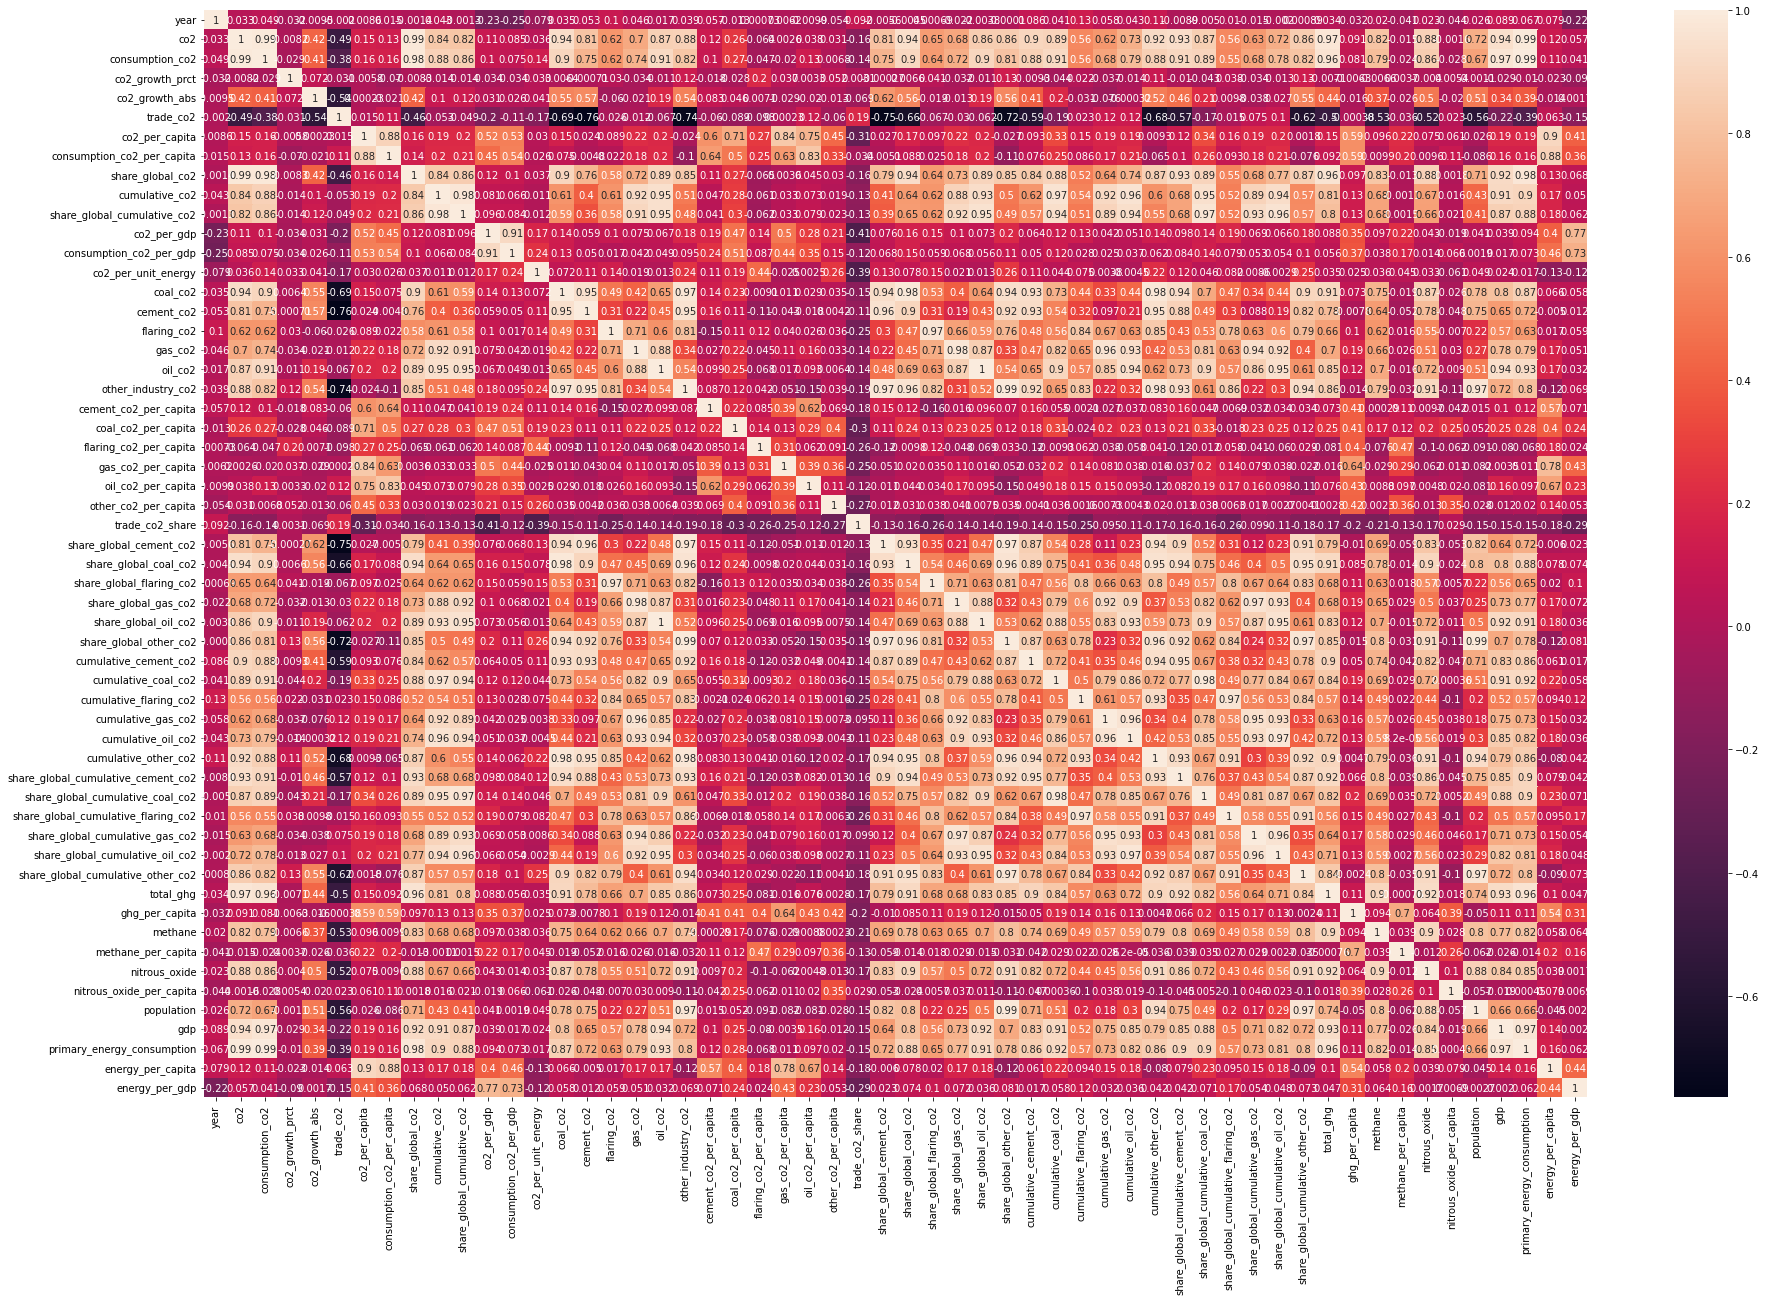

In [ ]:
plt.figure(figsize = (31,20))
sns.heatmap(country_data.corr(), annot=True)

**OBSERVATION**
***
We notice a strong correlation among features and thier cummulative and share values.
From alalysis, The share, cummulative, per capita and growth percent features are derived from the primary features. Example is shown below:
***
**co2_grwth_prct column is gotten directly by computing the percentage change of co2.**

In [ ]:
#co2 growth percent column
print(country_data[['co2','co2_growth_prct']].tail(3))

          co2  co2_growth_prct
25201  11.854            23.72
25202  10.949            -7.64
25203  10.531            -3.82


In [ ]:
#It's derivation using the pandas percentage change function
derivation = country_data[['co2']].pct_change()*100
print(derivation.tail(3))

             co2
25201  23.711125
25202  -7.634554
25203  -3.817700


In [ ]:
#removing redundant and repeated features
redundant_columns = ['cumulative_gas_co2','share_global_gas_co2','share_global_cumulative_gas_co2','trade_co2_share',
                     'share_global_coal_co2','cumulative_coal_co2','share_global_cumulative_coal_co2',
                     'cumulative_cement_co2','share_global_cumulative_cement_co2','share_global_cement_co2',
                     'co2_per_unit_energy','co2_per_capita','co2_growth_abs','share_global_cumulative_oil_co2',
                     'share_global_oil_co2','share_global_co2','cumulative_co2','cumulative_oil_co2',
                     'share_global_cumulative_co2','co2_growth_prct','energy_per_capita','ghg_per_capita',
                     'methane_per_capita','nitrous_oxide','nitrous_oxide_per_capita','total_ghg','co2_per_gdp',
                     'energy_per_gdp','cement_co2_per_capita','coal_co2_per_capita','consumption_co2_per_capita',
                     'gas_co2_per_capita','oil_co2_per_capita','consumption_co2_per_gdp','share_global_cumulative_other_co2',
                     'share_global_cumulative_flaring_co2','cumulative_other_co2','cumulative_flaring_co2',
                     'share_global_other_co2','share_global_flaring_co2','other_co2_per_capita',
                     'flaring_co2_per_capita']

data = country_data.drop(redundant_columns, axis='columns')

### **Reasons for removal**
1. Columns with cummulative values are gotten from prexisting values of other columns, for instance cummulative gas co2 is derived by adding the gas co2 from the first record year to present. This is of no use to the analysis.
2. Columns with 'share' for instance share global co2 shows the share in percentage of co2 from that contry compared to others. This is redundant.
3. columns with 'per gdp' or 'per capita', for instance co2 per gdp can be derived by dividing co2 emission by the population of that country. This is redundant.
4. The co2 per gdp, co2 per capita, and all 'co2' revealing attributes are removed. Since the aim is to predict co2 emission, using co2 per capita suggests that i already have the value of co2 ready, this is irrelevant to the analysis.
5. Green house gases are beyond the scope of this project.


In [ ]:
#check missing values percentage per column
print (round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False))

other_industry_co2            79.62
flaring_co2                   68.50
gas_co2                       49.25
consumption_co2               48.81
trade_co2                     48.81
coal_co2                      45.67
cement_co2                    35.80
gdp                           31.38
methane                       27.04
primary_energy_consumption    18.98
co2                            2.91
oil_co2                        2.91
population                     2.85
country                        0.00
year                           0.00
dtype: float64


In [ ]:
print('There were {} columns before.\n'.format(len(data.columns)))
#removing columns with missing values greater than or equal to 50%
disQ_col = []
for col in data.columns:
  if round((data[col].isnull().sum() * 100/ len(data[col])),2) >= 50 :
    disQ_col.append(col)
C_data = data.drop(disQ_col, axis='columns')
print('There are only {} columns after.\n'.format(len(C_data.columns)))
print(C_data.info())

There were 15 columns before.

There are only 13 columns after.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6771 entries, 42 to 25203
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     6771 non-null   object 
 1   year                        6771 non-null   int64  
 2   co2                         6574 non-null   float64
 3   consumption_co2             3466 non-null   float64
 4   trade_co2                   3466 non-null   float64
 5   coal_co2                    3679 non-null   float64
 6   cement_co2                  4347 non-null   float64
 7   gas_co2                     3436 non-null   float64
 8   oil_co2                     6574 non-null   float64
 9   methane                     4940 non-null   float64
 10  population                  6578 non-null   float64
 11  gdp                         4646 non-null   float64
 12  primary_energy_consumpt

***
### **5. Handling missing data optimally**
***

In [ ]:
#check for current sum of missing data
print(C_data.isna().sum())

country                          0
year                             0
co2                            197
consumption_co2               3305
trade_co2                     3305
coal_co2                      3092
cement_co2                    2424
gas_co2                       3335
oil_co2                        197
methane                       1831
population                     193
gdp                           2125
primary_energy_consumption    1285
dtype: int64


***
**There are missing values in the dataset, to handle them we will make use of the interpolate function.**
***
**Notice**

Each country is selected before applying the function this is to avoid filling missing values of a country with values from another country.
***

#### **5.1 Interpolation**
***

In [ ]:
print('Sum of overall missing value in the dataset before interpolation was {}'.format(C_data.isna().sum().sum()))
# code to perform the interpolate function bfill
for country in C_data['country'].unique():
    current_country = C_data[C_data['country'] == country]
    C_data[C_data['country'] == country] = current_country.interpolate(method = 'bfill', limit_direction='backward')

print('The sum of the overall missing values after bfill was {}'.format(C_data.isna().sum().sum()))

# code to perform the interpolate function ffill
for country in C_data['country'].unique():
    current_country = C_data[C_data['country'] == country]
    C_data[C_data['country'] == country] = current_country.interpolate(method = 'ffill', limit_direction='forward')

print('The sum of the overall missing values after ffill was {}'.format(C_data.isna().sum().sum()))

Sum of overall missing value in the dataset before interpolation was 21289
The sum of the overall missing values after bfill was 20234
The sum of the overall missing values after ffill was 17943


In [ ]:
print('Below are the sum missing values currently in the dataset: ')
#code to view the current sum of missing data
C_data.isna().sum()

Below are the sum missing values currently in the dataset: 


country                          0
year                             0
co2                            180
consumption_co2               3171
trade_co2                     3171
coal_co2                      2498
cement_co2                    2168
gas_co2                       2871
oil_co2                        180
methane                       1071
population                     193
gdp                           1791
primary_energy_consumption     649
dtype: int64

In [ ]:
#Re-check missing values percentage per column
print (round((C_data.isnull().sum() * 100/ len(C_data)),2).sort_values(ascending=False))

consumption_co2               46.83
trade_co2                     46.83
gas_co2                       42.40
coal_co2                      36.89
cement_co2                    32.02
gdp                           26.45
methane                       15.82
primary_energy_consumption     9.58
population                     2.85
co2                            2.66
oil_co2                        2.66
country                        0.00
year                           0.00
dtype: float64


***
Since the Consumption and trade Co2 had significantly high percentage of missing values, we will drop the columns before removing the remaining countries with missing values.
***
**Reason**
***
Countries will be excluded from this study because the missing values cannot be filled by interpolation, we will not use mean or median as it may affect the model, instead we will only selct the counries without missing values for the analysis.
***

***
#### **5.2 filtering countries with missing values per column**
***

In [ ]:
#dropping columns with high missing values
final_data = C_data.drop(['consumption_co2','trade_co2'], axis =1)

final_data.isna().sum()

country                          0
year                             0
co2                            180
coal_co2                      2498
cement_co2                    2168
gas_co2                       2871
oil_co2                        180
methane                       1071
population                     193
gdp                           1791
primary_energy_consumption     649
dtype: int64

In [ ]:
#code to get the columns with missing values
new_missing_cols = [x for x in final_data.columns if x not in ['country','year']]
#a list to hold name of countries with missing values
country_name = []
for col in new_missing_cols:
  x = final_data[final_data[col].isna()]
  country_name.append(x['country'].unique())
#converting count to array
a_count = np.concatenate( country_name, axis=0 )

#getting the name of the country and the frequency in the array a_count
names1, count1 = np.unique(a_count,return_counts = True)

print('Below are the names of countries with missing values:\n')
#the names of country with missing values
print(names1)

Below are the names of countries with missing values:

['Andorra' 'Angola' 'Anguilla' 'Antarctica' 'Antigua and Barbuda' 'Aruba'
 'Bahamas' 'Bahrain' 'Barbados' 'Belize' 'Bermuda' 'Bhutan'
 'Bonaire Sint Eustatius and Saba' 'British Virgin Islands' 'Brunei'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cape Verde'
 'Central African Republic' 'Chad' 'Christmas Island' 'Comoros' 'Congo'
 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Curacao'
 'Democratic Republic of Congo' 'Djibouti' 'Dominica' 'Ecuador'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Eswatini' 'Ethiopia'
 'Faeroe Islands' 'Fiji' 'French Guiana' 'French Polynesia' 'Gabon'
 'Gambia' 'Greenland' 'Grenada' 'Guadeloupe' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hong Kong' 'Kenya' 'Kiribati' 'Kosovo'
 'Kuwait' 'Laos' 'Leeward Islands' 'Lesotho' 'Liberia' 'Liechtenstein'
 'Macao' 'Madagascar' 'Malawi' 'Maldives' 'Mali' 'Malta'
 'Marshall Islands' 'Martinique' 'Mauritania' 'Mauritius' 'Mayotte'
 'Micronesia (country)' 'Mongol

Since the number of missing values are significant, filling them with mean, median, mode may affect the model, we simply work with the countries without missing values.

In [ ]:
#dropping countries with missing values
final_data1 = final_data[~final_data['country'].isin(names1)]

***
### **6. Final shape of data**
***

In [ ]:
print('Remaining missing values per column:\n')

print(final_data1.isna().sum())

print('Final shape of the dataset: {}'.format(final_data1.shape))

Remaining missing values per column:

country                       0
year                          0
co2                           0
coal_co2                      0
cement_co2                    0
gas_co2                       0
oil_co2                       0
methane                       0
population                    0
gdp                           0
primary_energy_consumption    0
dtype: int64
Final shape of the dataset: (3000, 11)


***
### **7. Exporting cleaned DataFrame to a file**
***
After cleaning and preparing the data, it will be exported to a csv file for further analysis.

In [ ]:
#Export clean DataFrame to csv and resetting the index

final_data1.to_csv("Cleaned_data.csv", index = False)